---

### Comparsion Between all the models, which is the most accurate for our task?

---

The fact that there are a low number of positive samples in the data makes it difficult for the models to learn to properly predict those cases. In addition, for our particular task we are interested on not missing possible drop out cases than on avoiding false positives. Therefore, the type of errors we should try to reduce are false negatives. 

Taking all of this into account, we will compare the performance of all the trained models and chose the most accurate for the task.

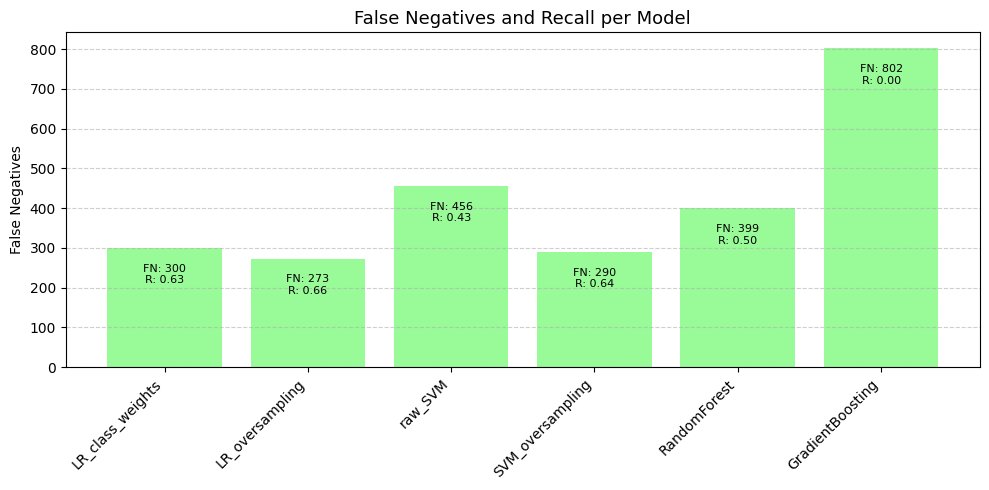

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model names and data
models = ['LR_class_weights', 'LR_oversampling', 'raw_SVM', 'SVM_oversampling', 'RandomForest', 'GradientBoosting']
false_negatives = [300, 273, 456, 290, 399, 802]
true_positives = [502, 529, 346, 512, 403, 0]

# Calculate recall
recall = [tp / (tp + fn) if (tp + fn) > 0 else 0 for tp, fn in zip(true_positives, false_negatives)]

# Create bar plot
plt.figure(figsize=(10, 5))
bars = plt.bar(models, false_negatives, color='palegreen')

# Add compact value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    label = f'FN: {int(height)}\nR: {recall[i]:.2f}'
    plt.text(bar.get_x() + bar.get_width()/2., height - 40,
             label, ha='center', va='top', fontsize=8, color='black')

# Final plot settings
plt.title('False Negatives and Recall per Model', fontsize=13)
plt.ylabel('False Negatives')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

By examining the plot, we can conclude that the **Logistic Regression** model with **oversampling** performed best. It achieved the lowest number of false negatives and the highest recall (66%), making it the most effective at identifying students at risk of dropping out, our primary goal.

This result highlights the importance of properly addressing class imbalance, as oversampling consistently improved model performance. In contrast, more complex models like Gradient Boosting failed to generalize and misclassified nearly all students as non-dropouts.

Overall, Logistic Regression with oversampling offered the best trade-off between simplicity, accuracy, and reliability for our specific classification task.